In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
names = [
    "race_id",
    "year",
    "month",
    "day",
    "times",
    "place",
    "daily",
    "race_num",
    "horse",
    "jockey_id",
    "horse_N",
    "waku_num",
    "horse_num",
    "class_code",
    "track_code",
    "corner_num",
    "dist",
    "state",
    "weather",
    "age_code",
    "sex",
    "age",
    "basis_weight",
    "blinker",
    "weight",
    "inc_dec",
    "weight_code",
    "win_odds",
    "rank",
    "time_diff",
    "time",
    "corner1_rank",
    "corner2_rank",
    "corner3_rank",
    "corner4_rank",
    "last_3F_time",
    "last_3F_rank",
    "Ave_3F",
    "PCI",
    "last_3F_time_diff",
    "leg",
    "pop",
    "prize",
    "error_code",
    "father",
    "mother",
    "id"
]


In [3]:
df = pd.read_csv("record_data_2023.csv", encoding="shift_jis", header=None, names=names)
df.head()

,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,...,Ave_3F,PCI,last_3F_time_diff,leg,pop,prize,error_code,father,mother,id
0,202307220101010101,23,7,22,1,札幌,1,1,ウィスピースノー,1095,...,35.8,53.8,0.8,後方,5.0,55,0,ワールドエース,ハイリマイリ,2021100648
1,202307220101010102,23,7,22,1,札幌,1,1,ロードスタウト,1157,...,35.6,51.4,0.6,中団,7.0,0,0,ロードカナロア,フィラデルフィア,2021100159
2,202307220101010103,23,7,22,1,札幌,1,1,コミックガール,1197,...,35.6,50.8,0.6,中団,4.0,0,0,シルバーステート,コイクレナイ,2021100265
3,202307220101010104,23,7,22,1,札幌,1,1,デビルシズカチャン,5339,...,35.3,51.1,0.3,先行,3.0,83,0,ベストウォーリア,シシリアンブリーズ,2021105553
4,202307220101010105,23,7,22,1,札幌,1,1,サトミノキラリ,1170,...,35.2,52.6,0.2,先行,1.0,550,0,ビッグアーサー,パレード,2021101429


In [4]:
df.columns

Index(['race_id', 'year', 'month', 'day', 'times', 'place', 'daily',
       'race_num', 'horse', 'jockey_id', 'horse_N', 'waku_num', 'horse_num',
       'class_code', 'track_code', 'corner_num', 'dist', 'state', 'weather',
       'age_code', 'sex', 'age', 'basis_weight', 'blinker', 'weight',
       'inc_dec', 'weight_code', 'win_odds', 'rank', 'time_diff', 'time',
       'corner1_rank', 'corner2_rank', 'corner3_rank', 'corner4_rank',
       'last_3F_time', 'last_3F_rank', 'Ave_3F', 'PCI', 'last_3F_time_diff',
       'leg', 'pop', 'prize', 'error_code', 'father', 'mother', 'id'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47672 entries, 0 to 47671
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   race_id            47672 non-null  int64  
 1   year               47672 non-null  int64  
 2   month              47672 non-null  int64  
 3   day                47672 non-null  int64  
 4   times              47672 non-null  int64  
 5   place              47672 non-null  object 
 6   daily              47672 non-null  object 
 7   race_num           47672 non-null  int64  
 8   horse              47672 non-null  object 
 9   jockey_id          47672 non-null  int64  
 10  horse_N            47672 non-null  int64  
 11  waku_num           47672 non-null  int64  
 12  horse_num          47672 non-null  int64  
 13  class_code         47672 non-null  int64  
 14  track_code         47672 non-null  int64  
 15  corner_num         46212 non-null  float64
 16  dist               476

In [6]:
for col in names:
    num_of_null = df[col].isna().sum()
    print(f"{col}: {num_of_null}")

race_id: 0
year: 0
month: 0
day: 0
times: 0
place: 0
daily: 0
race_num: 0
horse: 0
jockey_id: 0
horse_N: 0
waku_num: 0
horse_num: 0
class_code: 0
track_code: 0
corner_num: 1460
dist: 0
state: 0
weather: 0
age_code: 0
sex: 0
age: 0
basis_weight: 0
blinker: 41866
weight: 79
inc_dec: 4838
weight_code: 0
win_odds: 179
rank: 0
time_diff: 0
time: 0
corner1_rank: 0
corner2_rank: 0
corner3_rank: 0
corner4_rank: 0
last_3F_time: 398
last_3F_rank: 1460
Ave_3F: 1769
PCI: 1770
last_3F_time_diff: 1769
leg: 398
pop: 179
prize: 0
error_code: 0
father: 0
mother: 0
id: 0


# 単変量解析

In [7]:
df.year.unique()

array([23])

2023年のデータしかないっぽい

In [8]:
sorted(df.month.unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12)]

Text(0.5, 1.0, 'Count of racing ')

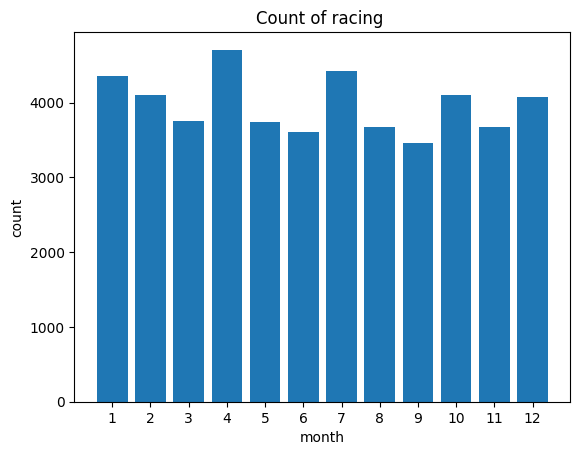

In [ ]:
month = df.month.value_counts().sort_index()
plt.bar(month.index, month)
plt.xlabel("month")
plt.ylabel("count")
plt.xticks(month.index)

plt.title("Count of racing by each month")
